In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [131]:
#### Import .csv data

In [132]:
loan_data = pd.read_csv("Train_Loan_Credit.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
#### Checking for a Missing Value in the dataset

In [135]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Analysing Each Features in the dataset

In [137]:
loan_data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [30]:
loan_data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [138]:
loan_data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [139]:
loan_data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [140]:
loan_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [146]:
##### Quick Vizualiation of the dataset

copy_data = loan_data.copy()
copy_data = copy_data.dropna()

In [147]:
copy_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [148]:
### Plotting the Categorical variable to the Target variable: Loan_Status

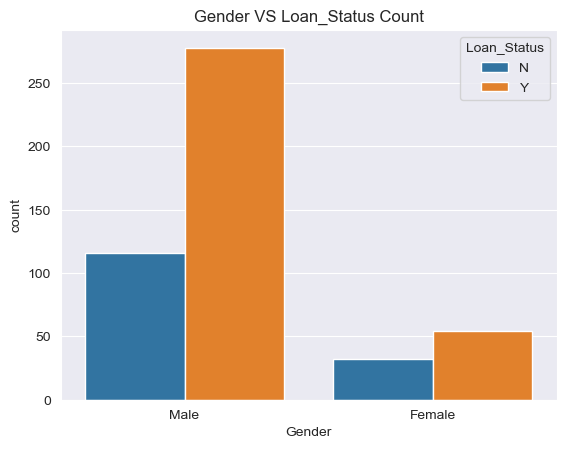

In [150]:
sns.countplot(x='Gender',hue='Loan_Status',data=copy_data)
plt.title("Gender VS Loan_Status Count");

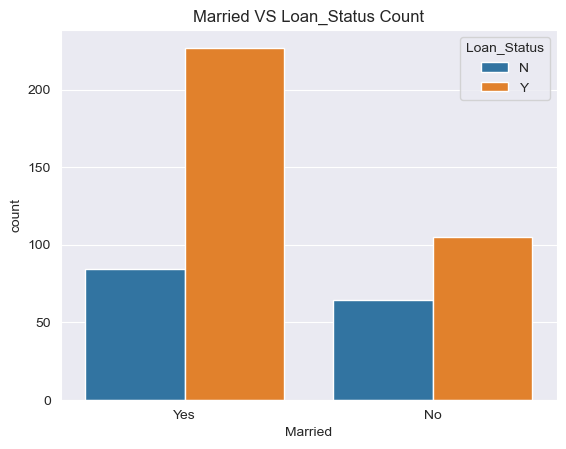

In [151]:
sns.countplot(x='Married',hue='Loan_Status',data=copy_data)
plt.title("Married VS Loan_Status Count");

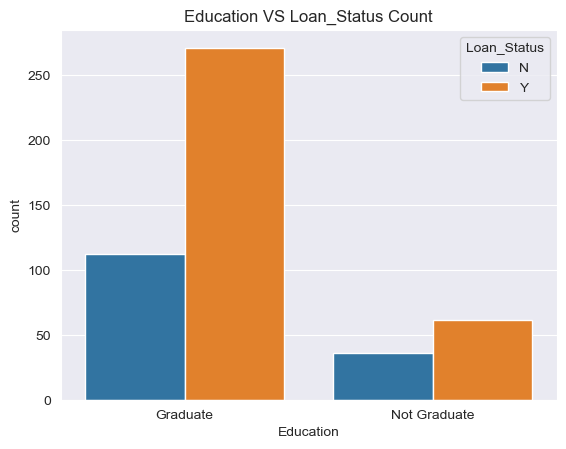

In [152]:
sns.countplot(x='Education',hue='Loan_Status',data=copy_data)
plt.title("Education VS Loan_Status Count");

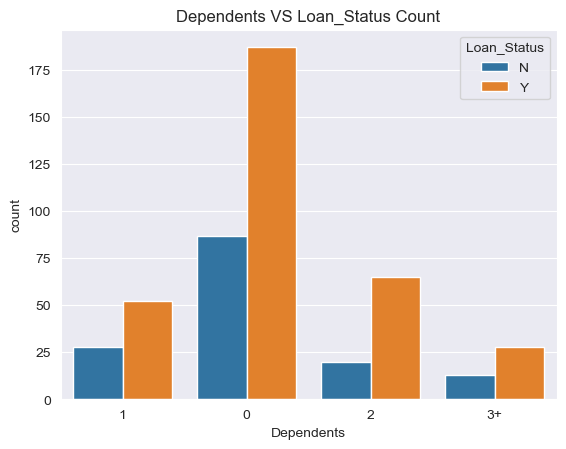

In [160]:
sns.countplot(x='Dependents',hue='Loan_Status',data=copy_data)
plt.title("Dependents VS Loan_Status Count");

In [161]:
loan_data.shape

(614, 13)

In [88]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [162]:
loan_data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [163]:
loan_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [164]:
loan_data['Credit_History'].mean().round(0)

1.0

#### Handling the Missing Values by imputation method

In [165]:
def Missing_value(value):
    loan_data[value] = loan_data[value].fillna(loan_data[value].mean().round(0))
    return loan_data

In [166]:
Missing_value('LoanAmount')
Missing_value("Credit_History")
Missing_value("Loan_Amount_Term")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [167]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
##### Handling the Categorical Missing Value by creating an additional value

In [169]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [170]:
cols = ['Gender','Married','Dependents','Self_Employed']

In [171]:
for i in cols:
    loan_data[i] = loan_data[i].fillna('NaN')

In [173]:
loan_data['Married'] = loan_data['Married'].replace(to_replace=['Yes','No','NaN'],value=[1,0,2])
loan_data['Married'].value_counts()


Married
1    398
0    213
2      3
Name: count, dtype: int64

In [174]:
loan_data['Gender'] = loan_data['Gender'].replace(to_replace=['Male','Female','NaN'],value=[1,0,2])
loan_data['Gender'].value_counts()


Gender
1    489
0    112
2     13
Name: count, dtype: int64

In [175]:
loan_data['Dependents'] = loan_data['Dependents'].replace(to_replace=['3+','NaN'],value=[3,4])
loan_data['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
4     15
Name: count, dtype: int64

In [176]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].replace(to_replace=['Yes','No','NaN'],value=[1,0,2])
loan_data['Self_Employed'].value_counts()



Self_Employed
0    500
1     82
2     32
Name: count, dtype: int64

In [177]:
loan_data['Education'] = loan_data['Education'].replace({'Graduate':1,"Not Graduate":0})

loan_data['Education'].value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [178]:
loan_data['Property_Area'] = loan_data['Property_Area'].replace({'Semiurban':1,"Urban":0,"Rural":2})

loan_data['Property_Area'].value_counts()

Property_Area
1    233
0    202
2    179
Name: count, dtype: int64

In [179]:
loan_data['Loan_Status']=loan_data['Loan_Status'].replace({'Y':1,"N":0})
loan_data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [180]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [181]:
loan_data['Dependents'] = loan_data['Dependents'].astype(int)   #### Converting the feature to an Integer

In [182]:
loan_data['Property_Area'].value_counts()

Property_Area
1    233
0    202
2    179
Name: count, dtype: int64

In [183]:
loan_data.duplicated().sum() ### Checking if there are duplicates in the dataset

0

In [184]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [185]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.838762,0.421752,0.0,1.00,1.0,1.00,2.0
Married,614.0,0.657980,0.484971,0.0,0.00,1.0,1.00,2.0
Dependents,614.0,0.842020,1.120531,0.0,0.00,0.0,2.00,4.0
Education,614.0,0.781759,0.413389,0.0,1.00,1.0,1.00,1.0
Self_Employed,614.0,0.237785,0.534737,0.0,0.00,0.0,0.00,2.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.397394,84.037503,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [188]:
#### Defining The feature and Target variable

In [189]:
X = loan_data.drop(['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [190]:
#### Splitting the Dataset into Training and Validation data

In [191]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [194]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((491, 11), (491,), (123, 11), (123,))

In [196]:
#### Model Building

In [206]:
model = SVC(random_state=2,probability=True)

In [207]:
model.fit(X_train,Y_train)

SVC(probability=True, random_state=2)

In [208]:
train_predict = model.predict(X_train)
train_accuracy = accuracy_score(train_predict,Y_train)
train_accuracy

0.6924643584521385

In [209]:
test_predict = model.predict(X_test)
test_accuracy = accuracy_score(test_predict,Y_test)
test_accuracy

0.6910569105691057